In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
#数据集迭代器
batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

In [4]:
#网络
net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [10]:
#损失函数
loss = nn.CrossEntropyLoss(reduction='none')

In [12]:
#优化算法
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

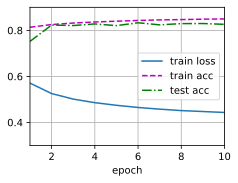

In [13]:
num_epochs = 10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

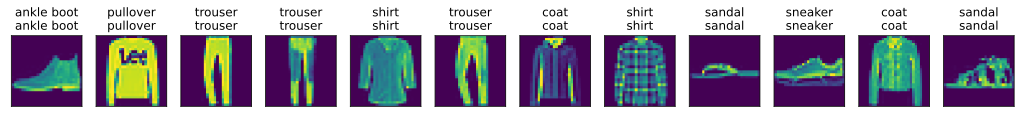

In [14]:
#测试数据样本预测

def predict_ch3(net,test_iter,n = 12):
    """预测标签"""
    for X,y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis = 1))
    titles = [true + '\n' + pred for true,pred in zip(trues,preds)]
    d2l.show_images(X[0:n].reshape((n,28,28)),1,n,titles = titles[0:n])

predict_ch3(net,test_iter)